In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.preprocess as prep
import src.eda as eda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chelsearamos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load Data

In [4]:
path_to_dir = 'data'

df = prep.merge_csv_mult_dir(path_to_dir)

	Non-zip folders/files found in data: ['links_1', 'links_6', 'links_8', 'links_9', 'links_7', 'links_10', 'links_5', 'links_2', 'links_3', 'links_4']


In [5]:
print('Shape:', df.shape)
df.head()

Shape: (1217375, 11)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",NaN,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,NaN,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1


In [6]:
eda.get_nulls(df)

,Total,Percent,Type
user_location,233152,0.19152,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
user_name,0,0.00000,object
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object


In [7]:
df = prep.clean_and_prep(df)

print('Shape:', df.shape)
df.head()

Shape: (1217375, 16)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,thechronictraveller,1.0,2,positive
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,bitsmom_tn,1.0,2,positive
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",n/a,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,D7133GLjoannew,1.0,2,positive
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Adrian L,1.0,2,positive
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,n/a,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Lydia B,1.0,2,positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217375 entries, 0 to 1217374
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   review_id        1217375 non-null  int64  
 1   url              1217375 non-null  object 
 2   hotel_name       1217375 non-null  object 
 3   review_date      1217375 non-null  object 
 4   review_body      1217375 non-null  object 
 5   user_location    1217375 non-null  object 
 6   user_name        1217375 non-null  object 
 7   helpful_vote     1217375 non-null  int64  
 8   rating           1217375 non-null  float64
 9   csv              1217375 non-null  object 
 10  folder           1217375 non-null  object 
 11  city             1217375 non-null  object 
 12  user_name_clean  1217375 non-null  object 
 13  polarity         1217375 non-null  float64
 14  sentiment_int    1217375 non-null  int64  
 15  sentiment        1217375 non-null  object 
dtypes: float64(2), int

# EDA

In [9]:
eda.print_unique_ct(df)

Count of Unique Values per Column:

review_id: 1217371
url: 243667
hotel_name: 779
review_date: 6099
review_body: 1217194
user_location: 72284
user_name: 998536
helpful_vote: 1279
rating: 5
csv: 779
folder: 10
city: 96
user_name_clean: 875089
polarity: 3
sentiment_int: 3
sentiment: 3


In [62]:
df.groupby('city').count()['rating'].sort_values(ascending=False)[:23]

city
London_England                                                         304218
New_York_City_New_York                                                 162516
Dubai_Emirate_of_Dubai                                                 147873
Honolulu_Oahu_Hawaii                                                   114959
Barcelona_Catalonia                                                     76147
Bangkok                                                                 37784
Punta_Cana_La_Altagracia_Province_Dominican_Republic                    36023
Nusa_Dua_Nusa_Dua_Peninsula_Bali                                        25147
Paris_Ile_de_France                                                     23684
Seminyak_Kuta_District_Bali                                             20110
Legian_Kuta_District_Bali                                               19036
Hanoi                                                                   13659
Varadero_Matanzas_Province_Cuba                            

In [10]:
df.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,1.217375e+06,1.217375e+06,1.217375e+06,1.217375e+06,1.217375e+06
mean,4.363706e+08,2.590393e+01,4.362044e+00,8.929820e-01,1.785964e+00
std,1.962223e+08,2.732269e+02,9.776615e-01,2.715207e-01,5.430415e-01
min,6.937280e+05,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.644167e+08,1.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00
50%,4.504562e+08,6.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00
75%,6.083789e+08,2.300000e+01,5.000000e+00,1.000000e+00,2.000000e+00
max,7.568581e+08,1.172290e+05,5.000000e+00,1.000000e+00,2.000000e+00


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a7c0f8310>)

Text(0.5, 1, 'Initial Balance of Review Sentiments')

Text(93.2, 0.5, '')

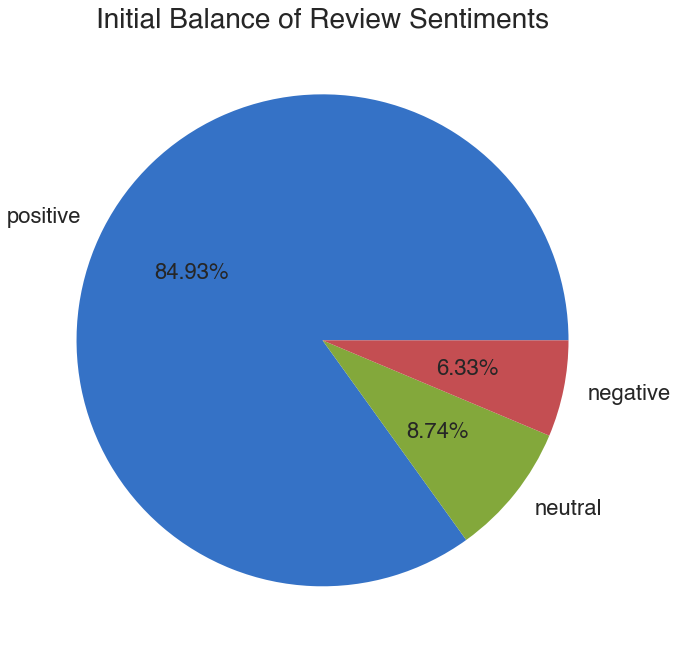

In [11]:
# Plot pie - Sentiments
fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_initial')

Total Number of Ratings:  1217375


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a7c82dd50>)

Text(0.5, 1, 'Counts of Hotel Ratings')

Text(0.5, 41.400000000000006, 'Hotel Rating')

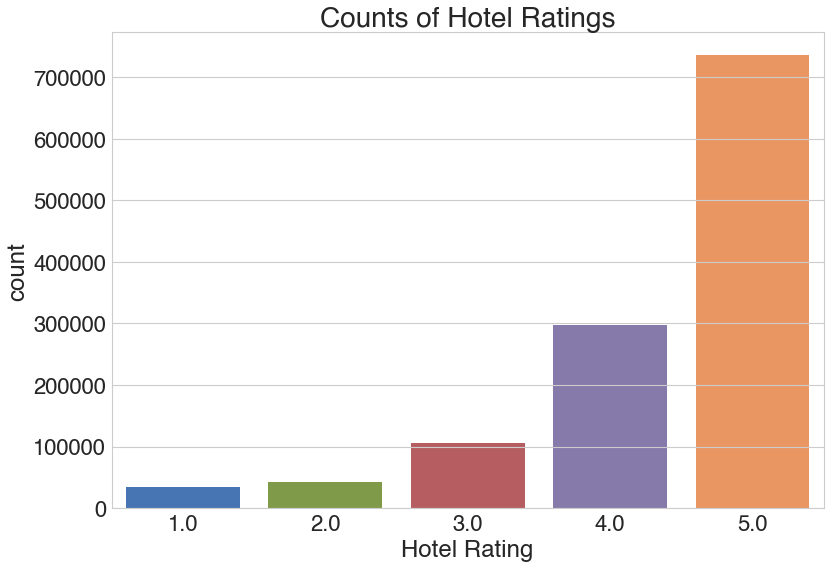

In [12]:
# Plot counts - Ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
eda.plot_counts(df, 'rating', fig, ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('imgs/countplot_ratings_full')

# Train-Test-Val Split

In [13]:
target = 'sentiment'
features = ['review_body']
X_train, X_val, X_test, y_train, y_val, y_test, \
    indices_train, indices_val, indices_test = prep.train_test_val_split(df, target, features)

	Train: 779120, Val: 194780, Test: 243475


In [14]:
indices_train.shape, indices_val.shape, indices_test.shape

((779120,), (194780,), (243475,))

## Handling class imbalance by under-sampling train data

In [15]:
train_df_us = prep.undersample_train(df, target, indices_train, y_train)

	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 661705
		Number neutral in train: 68069
		Number negative in train: 49346
	Final undersampled train size: 148038


Total Number of Ratings:  148038


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a7ca2cf50>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(93.2, 0.5, '')

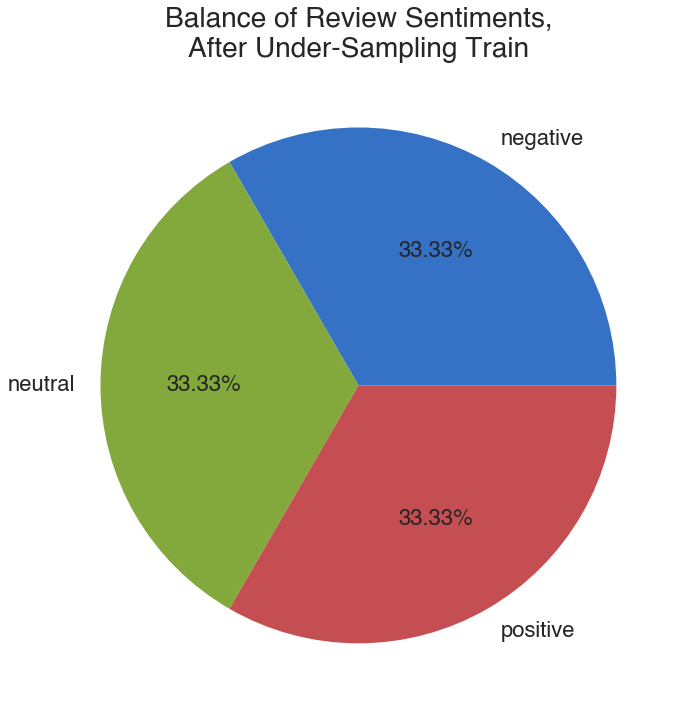

In [16]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')

# Modeling with TF-IDF

In [ ]:
! python src/preprocess.py data model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chelsearamos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing files in data...
	Non-zip folders/files found in data: ['links_1', 'links_6', 'links_8', 'links_9', 'links_7', 'links_10', 'links_5', 'links_2', 'links_3', 'links_4']

Splitting data into train/val/test...
	Train: 779120, Val: 194780, Test: 243475
	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 661705
		Number neutral in train: 68069
		Number negative in train: 49346
	Final undersampled train size: 148038

Getting bag of words for train data...

Starting modeling...

	Fitting LogisticRegression...
		Scores: {'fit_time': array([110.62286711,  78.71040106, 112.50553393,  95.31132507,
       171.02307677]), 'score_time': array([3.63833189, 3.57163   , 3.71794391, 3.68200397, 4.86130214]), 'test_accuracy': array([0.77137936, 0.76911646, 0.76840719, 0.76981795, 0.76620394]), 'train_a

```
Processing files in data...
	Non-zip folders/files found in data: ['links_1']

Splitting data into train/val/test...
	Train: 213140, Val: 53285, Test: 66607
	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 166155
		Number neutral in train: 26299
		Number negative in train: 20686
	Final undersampled train size: 62058
    
Getting bag of words for train data...

Starting modeling...

	Fitting LogisticRegression...
                Scores: {'fit_time': array([14.73221493, 14.67445898, 14.61940336, 14.66072369, 14.82588744]), 'score_time': array([1.42016864, 1.41654634, 1.41894245, 1.41845775, 1.41838765]), 'test_accuracy': array([0.75580084, 0.75733161, 0.7546729 , 0.75707034, 0.75183305]), 'train_accuracy': array([0.81660154, 0.81801152, 0.81873666, 0.81743106, 0.81745121])}
                Average train accuracy: 0.8176463969614115
                Average test accuracy: 0.7553417483627481
        
        
    Fitting MultinomialNB...
                Scores: {'fit_time': array([10.13023186, 10.1286757 , 10.13355589, 10.13215995, 10.13620377]), 'score_time': array([1.41610551, 1.41577578, 1.4157331 , 1.41798496, 1.41525722]), 'test_accuracy': array([0.7296165 , 0.7340477 , 0.72655495, 0.73168963, 0.72959471]), 'train_accuracy': array([0.7589131 , 0.75846997, 0.75959795, 0.75797128, 0.75811227])}
                Average train accuracy: 0.7586129151047422
                Average test accuracy: 0.7303006974596283


        Fitting RandomForestClassifier...
                Scores: {'fit_time': array([135.37750936, 135.43342757, 136.33951545, 135.32857227,
       135.47986341]), 'score_time': array([1.94026279, 1.93801475, 1.94030833, 1.94585085, 1.93872213]), 'test_accuracy': array([0.70488237, 0.70995811, 0.7087496 , 0.70904842, 0.69680122]), 'train_accuracy': array([1., 1., 1., 1., 1.])}
                Average train accuracy: 1.0
                Average test accuracy: 0.705887944725258


        Fitting GradientBoostingClassifier...
                Scores: {'fit_time': array([263.72342896, 266.55406952, 263.8704145 , 265.59878659,
       265.58436465]), 'score_time': array([1.4826808 , 1.48225331, 1.47889447, 1.48168659, 1.48074532]), 'test_accuracy': array([0.69416694, 0.69972607, 0.69344183, 0.69800983, 0.6876964 ]), 'train_accuracy': array([0.71729847, 0.71687548, 0.71788261, 0.71780772, 0.71849256])}
                Average train accuracy: 0.7176713680849213
                Average test accuracy: 0.6946082131200184


        Fitting XGBClassifier...
                Scores: {'fit_time': array([21.48981547, 21.50380468, 21.49269342, 21.56712437, 21.57016969]), 'score_time': array([1.61389542, 1.61442304, 1.61841702, 1.60971189, 1.61087203]), 'test_accuracy': array([0.72824686, 0.73324202, 0.73001934, 0.73249537, 0.72129562]), 'train_accuracy': array([0.85400637, 0.8536438 , 0.85275752, 0.85267992, 0.85541926])}
                Average train accuracy: 0.8537013733264303
                Average test accuracy: 0.7290598419431495
```

# LSTM

```
Train: 262240, Val: 65560, Test: 81950
Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 210407
		Number neutral in train: 29262
		Number negative in train: 22571
	Final undersampled train size: 67713
```

## Initial

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 250, 50)           9273100
_________________________________________________________________
lstm (LSTM)                  (None, 250, 50)           20200
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                2440
_________________________________________________________________
dropout (Dropout)            (None, 10)                0
_________________________________________________________________
dense (Dense)                (None, 8)                 88
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27
=================================================================
Total params: 9,295,855
Trainable params: 9,295,855
Non-trainable params: 0

Epoch 1/10
1059/1059 [==============================] - 362s 342ms/step - loss: 1.0864 - accuracy: 0.3643
Epoch 2/10
1059/1059 [==============================] - 373s 352ms/step - loss: 0.9109 - accuracy: 0.5358
Epoch 3/10
1059/1059 [==============================] - 381s 360ms/step - loss: 0.7072 - accuracy: 0.6770
Epoch 4/10
1059/1059 [==============================] - 381s 360ms/step - loss: 0.6283 - accuracy: 0.7241
Epoch 5/10
1059/1059 [==============================] - 373s 352ms/step - loss: 0.5818 - accuracy: 0.7497
Epoch 6/10
1059/1059 [==============================] - 376s 355ms/step - loss: 0.5502 - accuracy: 0.7666
Epoch 7/10
1059/1059 [==============================] - 386s 365ms/step - loss: 0.5234 - accuracy: 0.7808
Epoch 8/10
1059/1059 [==============================] - 384s 363ms/step - loss: 0.4974 - accuracy: 0.7972
Epoch 9/10
1059/1059 [==============================] - 378s 357ms/step - loss: 0.4776 - accuracy: 0.8064
Epoch 10/10
1059/1059 [==============================] - 386s 364ms/step - loss: 0.4598 - accuracy: 0.8167
2117/2117 [==============================] - 97s 46ms/step - loss: 0.3970 - accuracy: 0.8528

2117/2117 [==============================] - 99s 47ms/step - loss: 0.3970 - accuracy: 0.8528
Training Accuracy:  0.852760910987854
2049/2049 [==============================] - 117s 57ms/step - loss: 0.5592 - accuracy: 0.7957
Test Accuracy:  0.7957443594932556
```

## 2nd - max_length = 200

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, None, 64)          11869568
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048
_________________________________________________________________
dense (Dense)                (None, 64)                8256
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195
=================================================================

Total params: 11,944,067
Trainable params: 11,944,067
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2117/2117 [==============================] - 928s 438ms/step - loss: 0.6532 - accuracy: 0.7020 - val_loss: 0.4346 - val_accuracy: 0.8075
Epoch 2/2
2117/2117 [==============================] - 939s 444ms/step - loss: 0.5507 - accuracy: 0.7600 - val_loss: 0.3763 - val_accuracy: 0.8435

Took 1871.23s to train
2117/2117 [==============================] - 109s 52ms/step - loss: 0.4894 - accuracy: 0.7941
Training Accuracy:  0.7940868139266968
2049/2049 [==============================] - 103s 50ms/step - loss: 0.3763 - accuracy: 0.8435
Test Accuracy:  0.8434563875198364

saved_models/lstm_tokens5000_2epochs_20200602-21:39:36.h5
```

**Added 2 more Epochs**
```
Will save model to: saved_models/lstm_tokens5000_2epochs_20200602-22:34:44.h5

Epoch 1/2
2117/2117 [==============================] - 942s 445ms/step - loss: 0.5055 - accuracy: 0.7823 - val_loss: 0.4022 - val_accuracy: 0.8396
Epoch 2/2
2117/2117 [==============================] - 934s 441ms/step - loss: 0.4651 - accuracy: 0.8040 - val_loss: 0.4806 - val_accuracy: 0.8138

Took 1880.52s to train
```

## 3rd - maxlen = 200, embedding_dim = 128

```
Will save model to: saved_models/lstm_tokens5000_2epochs_20200602-23:18:07.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, None, 128)         23739136
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168
_________________________________________________________________
dense (Dense)                (None, 128)               32896
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387
=================================================================
Total params: 24,035,587
Trainable params: 24,035,587
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2117/2117 [==============================] - 961s 454ms/step - loss: 0.6566 - accuracy: 0.7026 - val_loss: 0.5774 - val_accuracy: 0.7563
Epoch 2/2
2117/2117 [==============================] - 983s 464ms/step - loss: 0.5426 - accuracy: 0.7653 - val_loss: 0.4475 - val_accuracy: 0.8238

Took 1948.19s to train
2117/2117 [==============================] - 111s 52ms/step - loss: 0.5011 - accuracy: 0.7897
Training Accuracy:  0.7897301912307739
2049/2049 [==============================] - 106s 52ms/step - loss: 0.4475 - accuracy: 0.8238
Test Accuracy:  0.823825478553772
```

**Added 2 more Epochs**
```
Will save model to: saved_models/lstm_tokens5000_2epochs_20200602-23:58:30.h5

Epoch 1/2
2117/2117 [==============================] - 938s 443ms/step - loss: 0.4882 - accuracy: 0.7922 - val_loss: 0.4260 - val_accuracy: 0.8349
Epoch 2/2
2117/2117 [==============================] - 934s 441ms/step - loss: 0.4365 - accuracy: 0.8178 - val_loss: 0.5029 - val_accuracy: 0.7982

Took 1876.64s to train
2117/2117 [==============================] - 110s 52ms/step - loss: 0.3579 - accuracy: 0.8578
Training Accuracy:  0.8578264117240906
2049/2049 [==============================] - 106s 52ms/step - loss: 0.5029 - accuracy: 0.7982
Test Accuracy:  0.798245906829834
```

## 4th - maxlen = 400, embedding_dim = 100, num_words = 10000 (prev 5000), added dropout, batch_size=500

```
Will save model to: saved_models/lstm_tokens5000_4epochs_20200603-01:17:09.h5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 400, 100)          18546200
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800
_________________________________________________________________
dense (Dense)                (None, 100)               20100
_________________________________________________________________
dropout (Dropout)            (None, 100)               0
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303
=================================================================
Total params: 18,727,403
Trainable params: 18,727,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
136/136 [==============================] - 462s 3s/step - loss: 0.8017 - accuracy: 0.6131 - val_loss: 0.4982 - val_accuracy: 0.7918
Epoch 2/4
136/136 [==============================] - 460s 3s/step - loss: 0.5711 - accuracy: 0.7511 - val_loss: 0.3904 - val_accuracy: 0.8361
Epoch 3/4
136/136 [==============================] - 462s 3s/step - loss: 0.5264 - accuracy: 0.7771 - val_loss: 0.4610 - val_accuracy: 0.8239
Epoch 4/4
136/136 [==============================] - 461s 3s/step - loss: 0.4864 - accuracy: 0.7947 - val_loss: 0.4550 - val_accuracy: 0.8014

Took 1858.39s to train
2117/2117 [==============================] - 184s 87ms/step - loss: 0.4243 - accuracy: 0.8273
Training Accuracy:  0.8273300528526306
2049/2049 [==============================] - 173s 85ms/step - loss: 0.4550 - accuracy: 0.8014
Test Accuracy:  0.801372766494751
```

## 4th - maxlen = 500, embedding_dim = 200, num_words = 10000 (prev 5000), added dropout, batch_size=1000

```
Will save model to: saved_models/lstm_tokens5000_5epochs_20200603-02:01:18.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 500, 200)          37092400
_________________________________________________________________
bidirectional (Bidirectional (None, 400)               641600
_________________________________________________________________
dense (Dense)                (None, 200)               80200
_________________________________________________________________
dropout (Dropout)            (None, 200)               0
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603
=================================================================
Total params: 37,814,803
Trainable params: 37,814,803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
68/68 [==============================] - 673s 10s/step - loss: 0.8739 - accuracy: 0.5732 - val_loss: 0.4085 - val_accuracy: 0.8338
Epoch 2/5
68/68 [==============================] - 675s 10s/step - loss: 0.5580 - accuracy: 0.7590 - val_loss: 0.4630 - val_accuracy: 0.7952
Epoch 3/5
68/68 [==============================] - 672s 10s/step - loss: 0.4998 - accuracy: 0.7890 - val_loss: 0.4149 - val_accuracy: 0.8224
Epoch 4/5
68/68 [==============================] - 674s 10s/step - loss: 0.4620 - accuracy: 0.8059 - val_loss: 0.4421 - val_accuracy: 0.8206
Epoch 5/5
68/68 [==============================] - 676s 10s/step - loss: 0.4371 - accuracy: 0.8197 - val_loss: 0.4888 - val_accuracy: 0.7863

Took 3411.24s to train
2117/2117 [==============================] - 356s 168ms/step - loss: 0.4065 - accuracy: 0.8345
Training Accuracy:  0.8344631195068359
2049/2049 [==============================] - 338s 165ms/step - loss: 0.4888 - accuracy: 0.7863
Test Accuracy:  0.7863331437110901
```

**Added 15 more epochs**

## 4th - maxlen = 500, embedding_dim = 64, lstm_cells = 100, num_words = 5000, added another dropout layer, batch_size=500

```
        Train: 262240, Val: 65560, Test: 81950
        Majority Class: positive, Middle Class: neutral, Minority Class: negative
                Number positive in train: 210407
                Number neutral in train: 29262
                Number negative in train: 22571
        Final undersampled train size: 67713

Will save model to: saved_models/lstm_tokens5000_10epochs_20200603-03:54:24.h5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 500, 64)           11869568
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000
_________________________________________________________________
dense (Dense)                (None, 400)               80400
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1203
=================================================================
Total params: 12,083,171
Trainable params: 12,083,171
Non-trainable params: 0
__________________________________________________________
Epoch 1/10
136/136 [==============================] - 565s 4s/step - loss: 0.7649 - accuracy: 0.6313 - val_loss: 0.5214 - val_accuracy: 0.7995
Epoch 2/10
136/136 [==============================] - 569s 4s/step - loss: 0.5628 - accuracy: 0.7526 - val_loss: 0.4160 - val_accuracy: 0.8436
Epoch 3/10
136/136 [==============================] - 564s 4s/step - loss: 0.5211 - accuracy: 0.7749 - val_loss: 0.4198 - val_accuracy: 0.8173
Epoch 4/10
136/136 [==============================] - 569s 4s/step - loss: 0.5006 - accuracy: 0.7862 - val_loss: 0.3700 - val_accuracy: 0.8438
Epoch 5/10
136/136 [==============================] - 568s 4s/step - loss: 0.4915 - accuracy: 0.7914 - val_loss: 0.4074 - val_accuracy: 0.8350
Epoch 6/10
136/136 [==============================] - 564s 4s/step - loss: 0.4723 - accuracy: 0.7996 - val_loss: 0.3928 - val_accuracy: 0.8379
Epoch 7/10
136/136 [==============================] - 563s 4s/step - loss: 0.4586 - accuracy: 0.8072 - val_loss: 0.4425 - val_accuracy: 0.8199
Epoch 8/10
136/136 [==============================] - 565s 4s/step - loss: 0.4618 - accuracy: 0.8071 - val_loss: 0.4907 - val_accuracy: 0.8134
Epoch 9/10
136/136 [==============================] - 565s 4s/step - loss: 0.4475 - accuracy: 0.8130 - val_loss: 0.4125 - val_accuracy: 0.8351
Epoch 10/10
136/136 [==============================] - 566s 4s/step - loss: 0.4327 - accuracy: 0.8185 - val_loss: 0.4203 - val_accuracy: 0.8363

Took 5689.54s to train
2117/2117 [==============================] - 234s 110ms/step - loss: 0.3933 - accuracy: 0.8364
Training Accuracy:  0.8364420533180237
2049/2049 [==============================] - 216s 105ms/step - loss: 0.4203 - accuracy: 0.8363
Test Accuracy:  0.8363178968429565
```

## 5th - Same as above + 1 LSTM layer, more data!

```
       Train: 529232, Val: 132309, Test: 165386
        Majority Class: positive, Middle Class: neutral, Minority Class: negative
                Number positive in train: 441995
                Number neutral in train: 50299
                Number negative in train: 36938
        Final undersampled train size: 110814

Will save model to: saved_models/lstm_tokens5000_7epochs_20200603-17:10:40.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 500, 64)           18985408
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 200)          132000
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0
_________________________________________________________________
dense (Dense)                (None, 400)               80400
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1203
=================================================================
Total params: 19,439,811
Trainable params: 19,439,811
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
111/111 [==============================] - 1649s 15s/step - loss: 0.7433 - accuracy: 0.6435 - val_loss: 0.4512 - val_accuracy: 0.8069
Epoch 2/7
111/111 [==============================] - 1648s 15s/step - loss: 0.5435 - accuracy: 0.7643 - val_loss: 0.4282 - val_accuracy: 0.8177
Epoch 3/7
111/111 [==============================] - 1651s 15s/step - loss: 0.5121 - accuracy: 0.7813 - val_loss: 0.4322 - val_accuracy: 0.8137
Epoch 4/7
111/111 [==============================] - 1653s 15s/step - loss: 0.4957 - accuracy: 0.7875 - val_loss: 0.4342 - val_accuracy: 0.8161
Epoch 5/7
111/111 [==============================] - 1654s 15s/step - loss: 0.4857 - accuracy: 0.7934 - val_loss: 0.3630 - val_accuracy: 0.8485
Epoch 6/7
111/111 [==============================] - 1654s 15s/step - loss: 0.4729 - accuracy: 0.7991 - val_loss: 0.3904 - val_accuracy: 0.8349
Epoch 7/7
111/111 [==============================] - 1651s 15s/step - loss: 0.4692 - accuracy: 0.8011 - val_loss: 0.3930 - val_accuracy: 0.8361

Took 11638.19s to train
3463/3463 [==============================] - 1409s 407ms/step - loss: 0.4372 - accuracy: 0.8174
Training Accuracy:  0.8173967003822327
4135/4135 [==============================] - 2448s 592ms/step - loss: 0.3930 - accuracy: 0.8361
Test Accuracy:  0.8360655903816223
```

# 6th
* Changed trunc type 'pre' -> 'post'
* Fit tokenizer on undersampled train data only (prev fit on all data...)
* Added oov token
```
    maxlen = 400 #PARAMS
    oov_tok = '<OOV>'
    num_words = 5000
    trunc_type = 'post'
    padding_type = 'post'
    embedding_dim=64 #PARAMS
    lstm_cells = 96 #PARAMS
    batch_size=1024 #PARAMS
```

```
Will save model to: saved_models/lstm_tokens5000_10epochs_20200603-20:33:06.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 400, 64)           6489728
_________________________________________________________________
dropout (Dropout)            (None, 400, 64)           0
_________________________________________________________________
bidirectional (Bidirectional (None, 400, 192)          123648
_________________________________________________________________
bidirectional_1 (Bidirection (None, 192)               221952
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0
_________________________________________________________________
dense (Dense)                (None, 384)               74112
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1155
=================================================================
Total params: 6,910,595
Trainable params: 6,910,595
Non-trainable params: 0
```
```_________________________________________________________________
Epoch 1/10
109/109 [==============================] - 2188s 20s/step - loss: 0.7259 - accuracy: 0.6476 - val_loss: 0.3155 - val_accuracy: 0.8693
Epoch 2/10
109/109 [==============================] - 1792s 16s/step - loss: 0.5380 - accuracy: 0.7657 - val_loss: 0.4426 - val_accuracy: 0.8186
Epoch 3/10
109/109 [==============================] - 1252s 11s/step - loss: 0.5082 - accuracy: 0.7808 - val_loss: 0.4700 - val_accuracy: 0.8048
Epoch 4/10
109/109 [==============================] - 1253s 11s/step - loss: 0.4923 - accuracy: 0.7899 - val_loss: 0.3965 - val_accuracy: 0.8461
Epoch 5/10
109/109 [==============================] - 1251s 11s/step - loss: 0.4809 - accuracy: 0.7947 - val_loss: 0.4030 - val_accuracy: 0.8402
Epoch 6/10
109/109 [==============================] - 1251s 11s/step - loss: 0.4706 - accuracy: 0.7992 - val_loss: 0.4467 - val_accuracy: 0.8115
Epoch 7/10
109/109 [==============================] - 1255s 12s/step - loss: 0.4608 - accuracy: 0.8045 - val_loss: 0.4321 - val_accuracy: 0.8258
Epoch 8/10
109/109 [==============================] - 1254s 12s/step - loss: 0.4521 - accuracy: 0.8085 - val_loss: 0.3993 - val_accuracy: 0.8421
Epoch 9/10
109/109 [==============================] - 1252s 11s/step - loss: 0.4453 - accuracy: 0.8116 - val_loss: 0.3885 - val_accuracy: 0.8482
Epoch 10/10
109/109 [==============================] - 1251s 11s/step - loss: 0.4374 - accuracy: 0.8151 - val_loss: 0.3958 - val_accuracy: 0.8468

Took 14100.57s to train
3463/3463 [==============================] - 618s 178ms/step - loss: 0.4206 - accuracy: 0.8255
Training Accuracy:  0.8255454897880554
4135/4135 [==============================] - 775s 187ms/step - loss: 0.3958 - accuracy: 0.8468
Test Accuracy:  0.8467527031898499
```

    * Future steps - Filter stopwords, stem/lemmatize!

# Filtered stopwords, punctuation

```
Will save model to: saved_models/lstm_tokens5000_15epochs_20200604-01:15:42.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 400, 64)           11723712
_________________________________________________________________
dropout (Dropout)            (None, 400, 64)           0
_________________________________________________________________
bidirectional (Bidirectional (None, 400, 192)          123648
_________________________________________________________________
bidirectional_1 (Bidirection (None, 192)               221952
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0
_________________________________________________________________
dense (Dense)                (None, 384)               74112
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1540
=================================================================
Total params: 12,144,964
Trainable params: 12,144,964
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
109/109 [==============================] - 1256s 12s/step - loss: 0.8117 - accuracy: 0.5944 - val_loss: 0.3260 - val_accuracy: 0.8708
Epoch 2/15
109/109 [==============================] - 1260s 12s/step - loss: 0.5677 - accuracy: 0.7496 - val_loss: 0.4532 - val_accuracy: 0.8121
Epoch 3/15
109/109 [==============================] - 1259s 12s/step - loss: 0.5267 - accuracy: 0.7723 - val_loss: 0.4615 - val_accuracy: 0.8253
Epoch 4/15
109/109 [==============================] - 1261s 12s/step - loss: 0.5062 - accuracy: 0.7834 - val_loss: 0.4083 - val_accuracy: 0.8211
Epoch 5/15
109/109 [==============================] - 1261s 12s/step - loss: 0.4958 - accuracy: 0.7893 - val_loss: 0.3933 - val_accuracy: 0.8405
Epoch 6/15
109/109 [==============================] - 1260s 12s/step - loss: 0.4838 - accuracy: 0.7938 - val_loss: 0.3510 - val_accuracy: 0.8596
Epoch 7/15
109/109 [==============================] - 1256s 12s/step - loss: 0.4715 - accuracy: 0.8010 - val_loss: 0.4201 - val_accuracy: 0.8359
Epoch 8/15
109/109 [==============================] - 1256s 12s/step - loss: 0.4637 - accuracy: 0.8041 - val_loss: 0.4225 - val_accuracy: 0.8284
Epoch 9/15
109/109 [==============================] - 1261s 12s/step - loss: 0.4577 - accuracy: 0.8073 - val_loss: 0.3611 - val_accuracy: 0.8566
Epoch 10/15
109/109 [==============================] - 1267s 12s/step - loss: 0.4477 - accuracy: 0.8114 - val_loss: 0.4180 - val_accuracy: 0.8329
Epoch 11/15
109/109 [==============================] - 1266s 12s/step - loss: 0.4397 - accuracy: 0.8157 - val_loss: 0.4120 - val_accuracy: 0.8358
Epoch 12/15
109/109 [==============================] - 1263s 12s/step - loss: 0.4350 - accuracy: 0.8162 - val_loss: 0.4117 - val_accuracy: 0.8349
Epoch 13/15
109/109 [==============================] - 1259s 12s/step - loss: 0.4265 - accuracy: 0.8216 - val_loss: 0.4176 - val_accuracy: 0.8328
Epoch 14/15
109/109 [==============================] - 1265s 12s/step - loss: 0.4225 - accuracy: 0.8225 - val_loss: 0.4480 - val_accuracy: 0.8161
Epoch 15/15
109/109 [==============================] - 1257s 12s/step - loss: 0.4118 - accuracy: 0.8292 - val_loss: 0.4059 - val_accuracy: 0.8382

Took 19032.49s to train
3463/3463 [==============================] - 638s 184ms/step - loss: 0.3843 - accuracy: 0.8424
Training Accuracy:  0.8423574566841125
4135/4135 [==============================] - 748s 181ms/step - loss: 0.4059 - accuracy: 0.8382
Test Accuracy:  0.8382498621940613

```

In [18]:
X_train, X_val, X_test, y_train, y_val, y_test, \
        indices_train, indices_val, indices_test, \
            train_df_us, df = prep.preprocess_split_undersample('data')

Processing files in data...
	Non-zip folders/files found in data: ['links_1', 'links_6', 'links_8', 'links_9', 'links_7', 'links_10', 'links_5', 'links_2', 'links_3', 'links_4']

Splitting data into train/val/test...
	Train: 779120, Val: 194780, Test: 243475
	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 661705
		Number neutral in train: 68069
		Number negative in train: 49346
	Final undersampled train size: 148038


In [19]:
target = 'sentiment'
features = ['review_body']
feature = 'review_body'

In [20]:
y_train_us = train_df_us[target]

In [21]:
set(y_train_us)

{'negative', 'neutral', 'positive'}

In [22]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english')) # 179
len(STOPWORDS)

179

In [23]:
import re
stop = [re.sub('[^\w\s]', '', stopword) for stopword in STOPWORDS]
stop

['after',
 'is',
 'with',
 'at',
 'in',
 'not',
 'all',
 'wasn',
 'up',
 'our',
 'yours',
 'than',
 'shouldve',
 'was',
 'mustn',
 've',
 'himself',
 'him',
 'hadn',
 'wont',
 'more',
 'where',
 'which',
 'thatll',
 'weren',
 'out',
 'they',
 'this',
 'didnt',
 'couldn',
 'against',
 'only',
 'or',
 'its',
 'hasnt',
 'yourself',
 'theirs',
 'down',
 'further',
 'itself',
 'youve',
 'when',
 'ma',
 'too',
 'shouldn',
 'and',
 'can',
 'will',
 'we',
 'neednt',
 'youd',
 'does',
 'if',
 're',
 'mightnt',
 'the',
 'shan',
 'a',
 'youre',
 'what',
 'me',
 'some',
 'myself',
 'she',
 'll',
 'your',
 'that',
 'for',
 'own',
 'd',
 'did',
 'arent',
 'now',
 'mustnt',
 'haven',
 'hasn',
 'under',
 'off',
 'be',
 'as',
 'yourselves',
 'm',
 'both',
 'its',
 'havent',
 'i',
 'these',
 'am',
 'hadnt',
 'shant',
 'you',
 'being',
 'themselves',
 'about',
 'why',
 'shes',
 'been',
 'ourselves',
 'their',
 'because',
 'over',
 'wasnt',
 'above',
 'other',
 'them',
 'ain',
 'between',
 'werent',
 'on'

In [24]:
stop_pat = ' | '.join(stop)
stop_pat

'after | is | with | at | in | not | all | wasn | up | our | yours | than | shouldve | was | mustn | ve | himself | him | hadn | wont | more | where | which | thatll | weren | out | they | this | didnt | couldn | against | only | or | its | hasnt | yourself | theirs | down | further | itself | youve | when | ma | too | shouldn | and | can | will | we | neednt | youd | does | if | re | mightnt | the | shan | a | youre | what | me | some | myself | she | ll | your | that | for | own | d | did | arent | now | mustnt | haven | hasn | under | off | be | as | yourselves | m | both | its | havent | i | these | am | hadnt | shant | you | being | themselves | about | why | shes | been | ourselves | their | because | over | wasnt | above | other | them | ain | between | werent | on | he | of | through | s | doesn | it | couldnt | isnt | do | didn | then | most | no | my | hers | just | here | few | herself | to | nor | wouldn | were | any | won | dont | ours | o | doing | so | don | mightn | t |

In [25]:
X_train_us_vals = train_df_us[feature].str.lower()
X_val_vals = df.loc[indices_val, feature].str.lower()

In [26]:
train_df_us[feature][736565]

'For those on a budget, you will find the melia to be an affordable option as you can get the all inclusive option with many activities included.The big plus at this hotel is the pools and beach area and you can walk to many restos on the beachfront.'

In [27]:
# Removing punctuation and stop words from X data
print('\nRemoving punctuation and stop words from X_train/val data...')
X_train_us_vals = X_train_us_vals.str.replace('[^\w\s]', '')
X_val_vals = X_val_vals.str.replace('[^\w\s]', '')

X_train_us_vals = X_train_us_vals.str.replace(stop_pat, ' ')
X_val_vals = X_val_vals.str.replace(stop_pat, ' ')


Removing punctuation and stop words from X_train/val data...


In [28]:
X_train_us_vals[736565]

'for on budget will find melia be affordable option you get all inclusive option many activities includedthe big plus this hotel the pools beach area you walk many restos the beachfront'

In [29]:
X_train_us_vals

979894    booked superior twin 3 nights just 300 poundsn...
234010    not good i never recommend ala moana hotel wil...
227709    i recently stayed the roosevelt hotel a friend...
679720    the hotel rooms very well designed aesthetical...
211157    designed not workingbasically freezersize hote...
                                ...                        
691155    i absolutely love hotel has very masculine cla...
898055    this a difficult review because excellence fan...
563991    jbr many hotels what wantmatters hotel great a...
792245    stayed with fiancé 9 nights had amazing time s...
797272    my wife i stayed for 12 nights dec 2011 are hi...
Name: review_body, Length: 148038, dtype: object

In [30]:
# Removing punctuation and stop words from X data
X_train_us_vals = train_df_us[feature].str.lower()
X_val_vals = df.loc[indices_val, feature].str.lower()

stop = [re.sub('[^\w\s]', '', stopword) for stopword in STOPWORDS]
stop_pat = ' | '.join(stop)

print('\nRemoving punctuation and stop words from X_train/val data...')
X_train_us_vals = X_train_us_vals.str.replace('[^\w\s]', '')
X_val_vals = X_val_vals.str.replace('[^\w\s]', '')

X_train_us_vals = X_train_us_vals.str.replace(stop_pat, ' ')
X_val_vals = X_val_vals.str.replace(stop_pat, ' ')

# Tokenize X data
print('\nTokenizing X_train/val data...')
X_train_us_vals = X_train_us_vals.values
X_val_vals = X_val_vals.values


Removing punctuation and stop words from X_train/val data...

Tokenizing X_train/val data...


In [31]:
X_train_us_vals

array(['booked superior twin 3 nights just 300 poundsnight was horrible tiny the small window overlooking small backyard a wall dont understand in room two persons is one chair went the reception talked a lovely lady whose name think chantal offered upgrade  a fee  a deluxe room i accepted even though thought was rip for room had scaffolding covering windows bigger letting us see little bit the road some sky the scaffolding was better the first room it have two chairs the window still small had wooden shutters covered half them bathroom very small a freestanding sink a narrow shower minibar free charge we to consume lot wine soft drinks chips plus put in suitcase order compensate the high pricehad wait ever the liftsbreakfast good a good variety the breakfast room seemed be understaffed one morning had wait a long line the staff removing dirty dishes unoccupied tables coffee brought your table a pot i usually think nice two the three mornings had go look a person could bring my coffee 

In [32]:
X_val_vals

array(['we booked hotel an agent had previously fixed us with good deals were disappointed this hotel was staying my husband a trip wimbledon have stayed near hyde park for same event its convenient both tennis central london although hotel wad clean staff helpful would stay because rooms ridiculously small  tiniest have ever stayed there no space move our bedroom bathroom  neither us big people furniture the room also small necessity meant storage a problem breakfast room also small doubled as small rather impersonal lounge breakfast ok there not enough fruit me overall thought was style substance size',
       'we stayed this hotel 3 nights visiting havana many friends told not expect much cuban hotels i to say this hotel certainly delivered rooms a good size the bathrooms great are great little touches as scented bath salts aftershave etc also maid manages amazing shapes of towels loved elephant breakfast also quite good although service breakfast slow the least friendly bar the sid

# Recommender System

## Check Data Sparsity

In [33]:
train_df_us.head()

,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
979894,736523580,https://www.tripadvisor.com/Hotel_Review-g1863...,Strand Palace,"January 3, 2020",Booked a Superior twin for 3 nights for just o...,Europe,"Argella_13</div><div class=""userLoc""><strong>E...",30,2.0,Strand_Palace-London_England__en.csv,links_5,London_England,Argella_13,0.0,0,negative
234010,529284069,https://www.tripadvisor.com/Hotel_Review-g6098...,Ala Moana Honolulu by Mantra,"October 2, 2017",Not Good and I will never recommend the Ala Mo...,"Keauhou, Hawaii","I616KLrogerm</div><div class=""userLoc""><strong...",2,1.0,Ala_Moana_Honolulu_by_Mantra-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,I616KLrogerm,0.0,0,negative
227709,575488218,https://www.tripadvisor.com/Hotel_Review-g6076...,The Roosevelt Hotel,"April 24, 2018",I recently stayed at the Roosevelt hotel for a...,"San Francisco, California","jnow21</div><div class=""userLoc""><strong>San F...",20,2.0,The_Roosevelt_Hotel-New_York_City_New_York__en...,links_1,New_York_City_New_York,jnow21,0.0,0,negative
679720,498994180,https://www.tripadvisor.com/Hotel_Review-g1874...,Alma Barcelona,"July 5, 2017",The hotel and rooms are very well designed aes...,n/a,John U,2,1.0,Alma_Barcelona-Barcelona_Catalonia__en.csv,links_9,Barcelona_Catalonia,John U,0.0,0,negative
211157,398932369,https://www.tripadvisor.com/Hotel_Review-g6076...,Hudson New York,"July 29, 2016","Designed, but not workingbasically a freezer-s...",n/a,Staffan S,3,1.0,Hudson_New_York-New_York_City_New_York__en.csv,links_1,New_York_City_New_York,Staffan S,0.0,0,negative


In [34]:
utility_matrix = train_df_us.pivot_table(values='rating',index='user_name_clean',columns='hotel_name')

In [35]:
utility_matrix

hotel_name,'Alohilani Resort Waikiki Beach,414 Hotel,6 Columbus - Central Park Hotel,A.Roma Lifestyle Hotel,AC Hotel Barcelona Forum by Marriott,ANA InterContinental Tokyo,APA Hotel & Resort Nishishinjuku Gochome-eki Tower,APA Hotel Shinjuku Gyoemmae,APA Hotel Shinjuku Kabukicho Tower,ARTOTEL Sanur,...,White Sands Hotel,Wyndham Garden Chinatown,YOTEL New York,Yellow Square,Yes Hotel,Zoetry Agua Punta Cana,dusitD2 Ao Nang Krabi,iQ Hotel Roma,ibis Styles Bangkok Khaosan Viengtai,nine hours Shinjuku-North
user_name_clean,,,,,,,,,,,,,,,,,,,,,
-80-J-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Alex--Goat--001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Bex-689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-ElenaG1898-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-OuidaWarren-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
지호 우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지훈 배,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
진구 윤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min number of ratings: 1


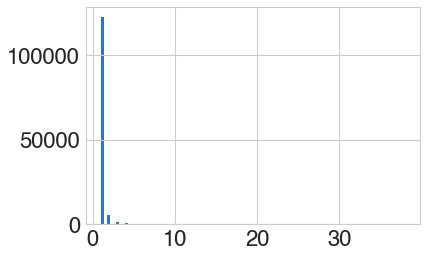

In [36]:
ratings = (utility_matrix > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

In [37]:
num_reviews_by_user = train_df_us.groupby('user_name_clean').count()['rating']

In [38]:
num_reviews_by_user[num_reviews_by_user > 5][0:100]

user_name_clean
A S         7
Adam B     11
Adam H      7
Adam P      6
Ahmad A     6
           ..
C S         7
Carol B    10
Carol C     6
Carol M     6
Carol R     7
Name: rating, Length: 100, dtype: int64

In [39]:
num_reviews_by_user_loc = train_df_us.groupby('user_location').count()['rating']

In [40]:
num_reviews_by_user_loc

user_location
 Australia             1
 Israel                1
 Sunderland England    1
, The Netherlands      1
-                      1
                      ..
福岡                     2
阿德莱德                   1
香港, 中國                 1
싱가폴, Singapore         1
용인                     1
Name: rating, Length: 21193, dtype: int64

In [41]:
num_reviews_by_user_loc[num_reviews_by_user_loc > 5]

user_location
.                     41
Aachen, Germany        6
Aalborg, Denmark      11
Aarhus, Denmark       23
Abbotsford, Canada    17
                      ..
wales                 10
washington             6
west midlands          6
worcester              6
yorkshire             10
Name: rating, Length: 2414, dtype: int64

Min number of ratings: 1


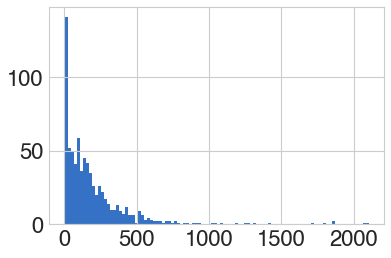

In [42]:
ratings = (utility_matrix > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

In [43]:
number_ratings = (train_df_us['rating'] > 0).sum()
density = number_ratings / (utility_matrix.shape[0] * utility_matrix.shape[1])
print('The density is: {} '.format(density))

The density is: 0.0014925045397290336 
